# Lab 4: Linear regression
## BIOS 26210 fall 2022
## Name: Keegan Ballantyne


In this assignment you will write your own functions to perform linear regression and polynomial regression and apply them to a real data set.

In [4]:
# Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy import stats
import pandas as pd

## Part 1: Linear regression

### Q1.1 Write your own linear regression function 

* Inputs: array with two vectors (X and Y) for the explanatory and response data. Make sure to check that they are the same length!

* DO: calculate  the slope and intercept of the best-fit line, and the coefficient of determination $r^2$.

* Outputs: the best-fit slope, intercept, and the coefficient of determination $r^2$.

To calculate the slope and intercept, solve the normal equation below, where $\vec \beta$ is the vector of parameters (slope and intercept), $M$ is the matrix containing a column of x values and a column of ones, $M^T$ is its transpose, and $y$ is the column vector of y values:

$$
(M^T M) \vec \beta = M^T y
$$

To calculate the coefficient of determination, you can use either the definition:

$$ r^2 = \frac{Cov(X,Y)^2}{Var(X)Var(Y)}$$

or the fact that the coefficient of determination determines the fraction of variance explained by linear regression:

$$ r^2 = \frac{Var(\hat Y)}{Var(Y)} $$

where $\hat Y$ is the predicted response values: $\hat Y = aX + b$

You may find the following numpy functions useful for performing array calculations:

* .T for array transpose

* np.column_stack() for stacking column vectors together https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html

* np.linalg.solve() for inverting a matrix https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html

* np.var() for calculating the variance of a vector or matrix https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.var.html (Please note you have to specify ddof=1 otherwise variance will be incorrect!)

* np.cov() for calculating the covariance between vectors https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html


Test your function on the simulated data below and make sure it returns the same values as the `linregress` function.

In [5]:
# defining the R^2 function

# def r_squared(X,Y):
#     """Function that defines R squared"""
#     return (np.cov(X, Y)**2)/(np.var(X, ddof=1)*np.var(Y, ddof=1))

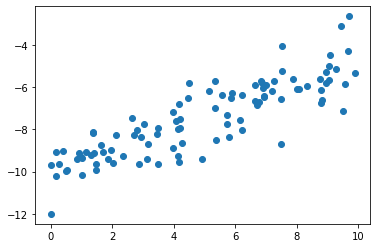

In [6]:
a = 0.5 # slope
b = -10 # intercept
w = 1 # noise strength
numpoints = 100 # number of data points
rng = np.random.RandomState(1)
x = np.sort(10*rng.rand(numpoints)) # random x values between 0 and 10
y = a * x + b + w*rng.randn(numpoints) # linear model plus random normal noise
plt.scatter(x, y)
plt.show()

[ 0.51579892 -9.99289417]
Model slope:     0.5157989229275424
Model intercept: -9.99289417060341
R^2:             0.7409462695348447


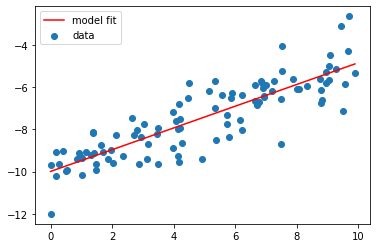

In [7]:
# defining linear regression function

def lin_reg(x, y):
    """Function that defines linear regression function"""
    ones = np.ones(len(x))
    M = np.column_stack((x, ones))
    beta_hat = np.linalg.solve(M.T@M, M.T@y) # Use @ for matrix multiplications 
    return(beta_hat)

linereg = lin_reg(x,y)
print(linereg)

r_squared = np.var(linereg[0]*x+linereg[1], ddof=1)/np.var(y, ddof=1)
r_squared

slope, intercept, r, p_value, std_err = stats.linregress(x,y)

print("Model slope:    ", slope)
print("Model intercept:", intercept)
print("R^2:            ", r**2)

yfit = x*slope + intercept

plt.scatter(x, y, label = 'data')
plt.plot(x, yfit, 'r', label = 'model fit')
plt.legend()
plt.show()

### Q1.2 Residuals of linear regression

Plot the residuals of the predictions obtained from the linear regression model and report the fraction of total variance that is in the residuals (it should be complementary to the coefficient of determination R-squared). Plot the histogram of the residuals to see if it has a normal shape.

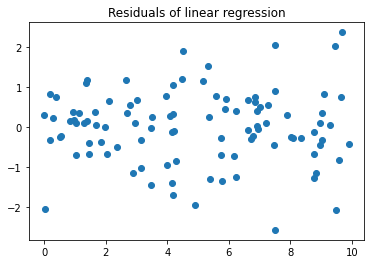

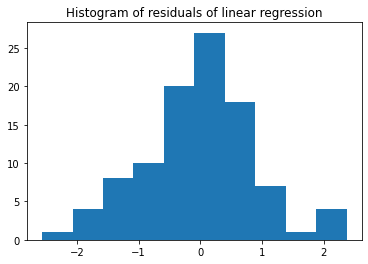

In [8]:
resid = y - yfit

plt.scatter(x, resid)
plt.title('Residuals of linear regression')
plt.show()

plt.hist(resid)
plt.title('Histogram of residuals of linear regression')
plt.show()

### Q1.3 Signal, noise, and correlation

Generate new data sets with increasing amount of noise (parameter w) and report how it affects the coefficient of determination; specifically, what is the threshold value of w to make R^2 less than 0.5? less than 0.1?


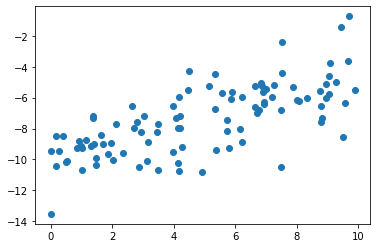

[ 0.52764812 -9.9875648 ]
Model slope:     0.5276481151231989
Model intercept: -9.987564798555965
R^2:             0.49427181501437706


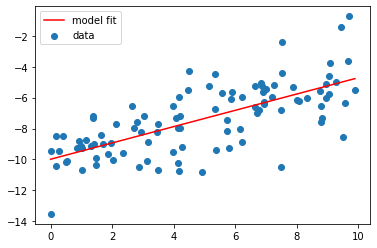

In [9]:
a = 0.5 # slope
b = -10 # intercept
w = 1.75 # noise strength
numpoints = 100 # number of data points
rng = np.random.RandomState(1)
x = np.sort(10*rng.rand(numpoints)) # random x values between 0 and 10
y = a * x + b + w*rng.randn(numpoints) # linear model plus random normal noise
plt.scatter(x, y)
plt.show()

linereg = lin_reg(x,y)
print(linereg)

r_squared = np.var(linereg[0]*x+linereg[1], ddof=1)/np.var(y, ddof=1)
r_squared

slope, intercept, r, p_value, std_err = stats.linregress(x,y)

print("Model slope:    ", slope)
print("Model intercept:", intercept)
print("R^2:            ", r**2)

yfit = x*slope + intercept

plt.scatter(x, y, label = 'data')
plt.plot(x, yfit, 'r', label = 'model fit')
plt.legend()
plt.show()

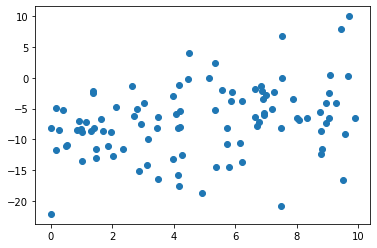

[ 0.59479354 -9.95736502]
Model slope:     0.594793537565253
Model intercept: -9.95736502362045
R^2:             0.09555395136988938


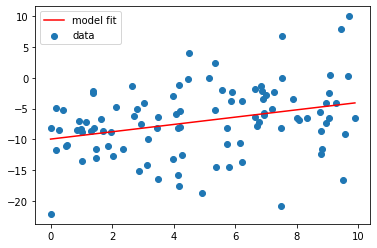

In [10]:
a = 0.5 # slope
b = -10 # intercept
w = 6 # noise strength
numpoints = 100 # number of data points
rng = np.random.RandomState(1)
x = np.sort(10*rng.rand(numpoints)) # random x values between 0 and 10
y = a * x + b + w*rng.randn(numpoints) # linear model plus random normal noise
plt.scatter(x, y)
plt.show()

linereg = lin_reg(x,y)
print(linereg)

r_squared = np.var(linereg[0]*x+linereg[1], ddof=1)/np.var(y, ddof=1)
r_squared

slope, intercept, r, p_value, std_err = stats.linregress(x,y)

print("Model slope:    ", slope)
print("Model intercept:", intercept)
print("R^2:            ", r**2)

yfit = x*slope + intercept

plt.scatter(x, y, label = 'data')
plt.plot(x, yfit, 'r', label = 'model fit')
plt.legend()
plt.show()

## Part 2 Application to penguin data


The data set from the file `Macaroni_Penguin_Green.csv` (courtesy of Jonathan Green, see https://jeb.biologists.org/content/204/4/673.short)
is read in below into a pandas object.

Here is a good introduction to pandas: https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html


The data set contains four variables from observations on several individual macaroni penguins exercising on a treadmill. 

* group: BM (breeding male), BF (breeding female), MF (moulting female)
* ID: individual penguins ID code
* Heart Rate: measured during exercise in bpm
* Mass Specific VO2: oxygen consumption during exercise

Use your function from above to calculate linear regression between heart rate (explanatory) and oxygen consumption (response) on all of the penguins at once and report the slope, intercept, and R-squared. Use the .iloc factor (see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) to select these variables. Produce a plot of residuals and report whether it looks consistent with the assumptions of linear regression.

NOTE: the conversion between pandas objects and numpy array may need to be performed explicitly using `np.array()` function.

Model slope:     0.18035385335380294
Model intercept: -2.868821773409703
R^2:             0.490828121507964


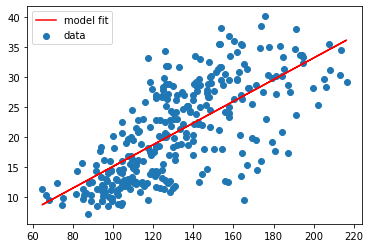

In [11]:
macaroni = pd.read_csv("Macaroni_Penguins_Green.csv")
macaroni.head()

bpm = np.array(macaroni["Heart Rate"]) #X
oxy = np.array(macaroni["Mass Specific VO2"]) #Y

linereg = lin_reg(bpm,oxy)

r_squared = np.var(linereg[0]*bpm+linereg[1], ddof=1)/np.var(y, ddof=1)
r_squared

# Check
slope, intercept, r, p_value, std_err = stats.linregress(bpm,oxy)

print("Model slope:    ", slope)
print("Model intercept:", intercept)
print("R^2:            ", r**2)

yfit = bpm*slope + intercept

plt.scatter(bpm, oxy, label = 'data')
plt.plot(bpm, yfit, 'r', label = 'model fit')
plt.legend()
plt.show()

Your answers here

### Q 2.2 Residuals analysis

Produce a plot of residuals as a function of the explanatory values and report whether it looks consistent with the assumptions of linear regression. Produce a histogram of residuals and answer the same question. Report the mean and variance of the residuals, and check that fraction of residual variance is complementary to the coefficient of determination.

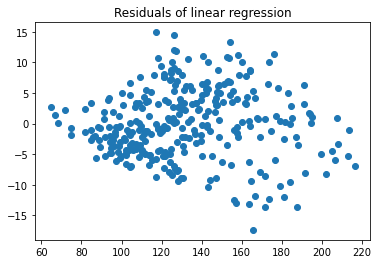

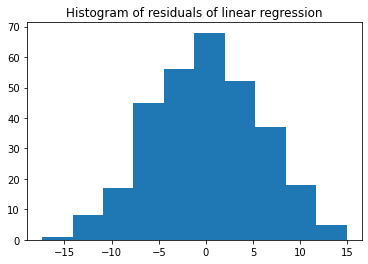

3.703154323179675e-15
32.330647017930815


In [12]:
# slope, intercept, r, p_value, std_err = stats.linregress(bpm,oxy)

# print("Model slope:    ", slope)
# print("Model intercept:", intercept)
# print("R^2:            ", r**2)

yfit = linereg[0]*bpm+linereg[1]

# plt.scatter(bpm, oxy, label = 'data')
# plt.plot(bpm, yfit, 'r', label = 'model fit')
# plt.legend()
# plt.show()

resid = oxy - yfit

plt.scatter(bpm, resid)
plt.title('Residuals of linear regression')
plt.show()

plt.hist(resid)
plt.title('Histogram of residuals of linear regression')
plt.show()

print(np.mean(resid))
print(np.var(resid))

your answers here

## Part 3 Polynomial regression

### Q 3.1 Write your own quadratic regression function 

Starting from the linear regression function, modify it to make a new function to perform a quadratic function fit.

* Inputs: array with two vectors (X and Y) for the explanatory and response data. Make sure to check that they are the same length!

* DO: calculate  the the best-fit parameters of a quadratic $Y = aX^2 + bX +c$ and the coefficient of determination $r^2$. Use the generalized normal equation to calculate the vector of parameters (a,b,c) and calculate the coefficient of determination as the ratio of predicted variance over the variance of the response variable (X).

* Outputs: the best-fit parameters a,b,c, and the coefficient of determination $r^2$.


Use your function to calculate quadratic regression between the oxygen consumption (Y) and heart rate (X) and report the best-fit parameters and R-squared. Make a plot of the data and the best-fit line over it. Is the fit substatially better than linear?


[-9.80636778e-04  4.53716491e-01 -2.09346000e+01]
0.5122718448458596


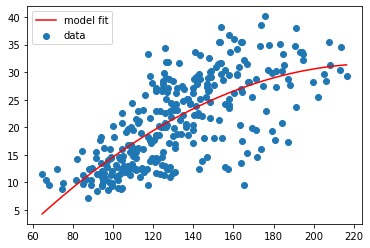

In [14]:
x = np.array(macaroni["Heart Rate"]) #X
y = np.array(macaroni["Mass Specific VO2"]) #Y

def quad_reg(x, y):
    """Function that defines quadratic regression function"""
    ones = np.ones(len(x))
    M = np.column_stack((x**2, x, ones))
    beta_hat = np.linalg.solve(M.T@M, M.T@y) # Use @ for matrix multiplications 
    return(beta_hat)

# bpm = x values
# oxy = y values

# x = np.sort(x) 

quadreg = quad_reg(x,y)
print(quadreg)

r_squared = np.var(quadreg[0]*(x)**2+quadreg[1]*(x)+quadreg[2], ddof=1)/np.var(y, ddof=1)
print(r_squared)

# print(quadreg[0]*np.square(bpm)+quadreg[1]*bpm+quadreg[2])

# print(oxy)

qfit = quadreg[0]*np.sort(x)**2+quadreg[1]*np.sort(x)+quadreg[2]
# print(qfit.shape)
# print(bpm.shape)

plt.scatter(x, y, label = 'data')
plt.plot(np.sort(x), qfit, 'r', label = 'model fit')
plt.legend()
plt.show()

The fit is not better than the linear regression fit because of the R<sup>2</sup> value is lower

### Q 3.2 Residuals analysis

Produce a plot of residuals as a function of the explanatory values and report whether it looks consistent with the assumptions of linear regression. Produce a histogram of residuals and answer the same question. Report the mean and variance of the residuals, and check that fraction of residual variance is complementary to the coefficient of determination. Are the statistics of residuals substantially improved from the linear model?


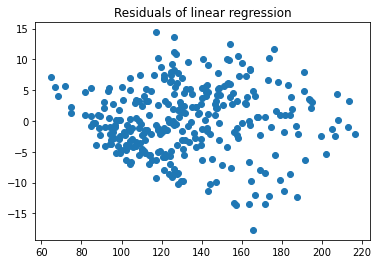

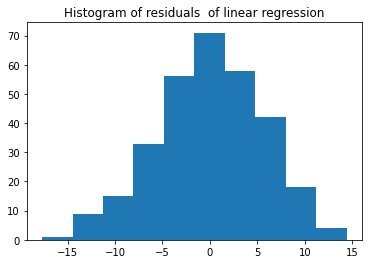

-5.091837194372053e-15
30.969045014221923


In [15]:
myfit = quadreg[0]*x**2+quadreg[1]*x+quadreg[2]
resid = oxy - myfit 

plt.scatter(bpm, resid)
plt.title('Residuals of linear regression')
plt.show()

plt.hist(resid)
plt.title('Histogram of residuals  of linear regression')
plt.show()

print(np.mean(resid))
print(np.var(resid))

The statistics of the model did not statistically change or improve compared to the linear model